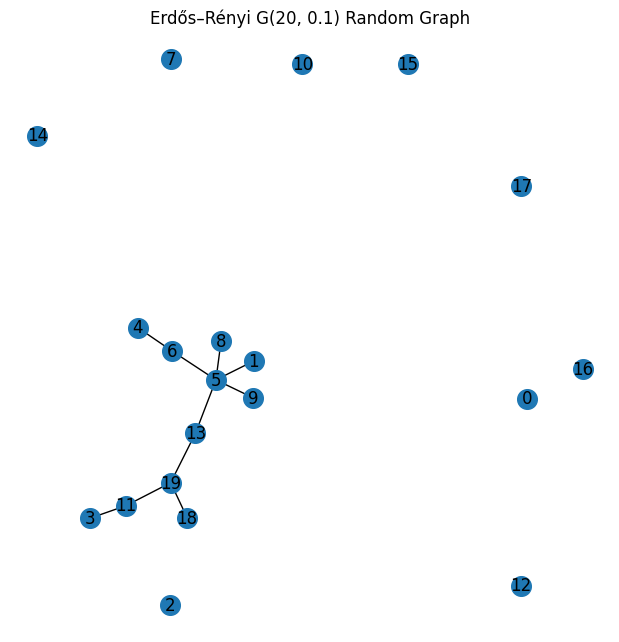

In [ ]:
def erdos_renyi_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(i + 1, N):
            if random.random() < p:
                G.add_edge(i, j)
    return G
N = 20
p = 0.1
G = erdos_renyi_graph(N, p)

plt.figure(figsize=(6, 6))
nx.draw(G, node_size=200, with_labels=True)
plt.title(f"Erdős–Rényi G({N}, {p}) Random Graph")
plt.show()


## Track Larget component ER

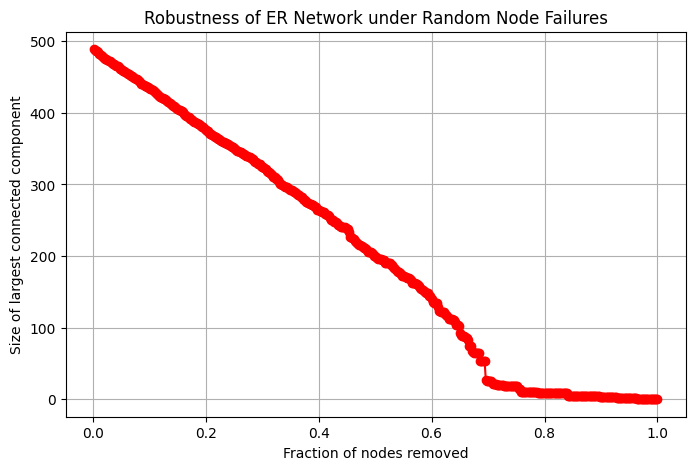

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Parameters
N = 500       # number of nodes
avg_k = 4     # average degree
p = avg_k / (N - 1)

# Generate ER network
G = nx.erdos_renyi_graph(N, p)

# Track largest component size
largest_component_sizes = []
fraction_removed = []

# Create a list of nodes to remove
nodes = list(G.nodes())
random.shuffle(nodes)

for i, node in enumerate(nodes):
    # Remove the node
    G.remove_node(node)

    # Compute size of largest connected component
    if len(G) > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        largest_component_sizes.append(len(largest_cc))
    else:
        largest_component_sizes.append(0)

    fraction_removed.append((i + 1) / N)

# Plot the results
plt.figure(figsize=(8,5))
plt.plot(fraction_removed, largest_component_sizes, marker='o', linestyle='-', color='red')
plt.xlabel("Fraction of nodes removed")
plt.ylabel("Size of largest connected component")
plt.title("Robustness of ER Network under Random Node Failures")
plt.grid(True)
plt.show()


## All metrics

Nodes: 5, Edges: 6, Avg degree: 2.40
Connected components: 1
GCC size: 5 nodes
Avg path length: 1.40, Diameter: 2
Avg clustering coefficient: 0.333
Top 5 nodes by degree centrality: [('B', 0.75), ('C', 0.75), ('A', 0.5), ('D', 0.5), ('E', 0.5)]
Detected 2 communities


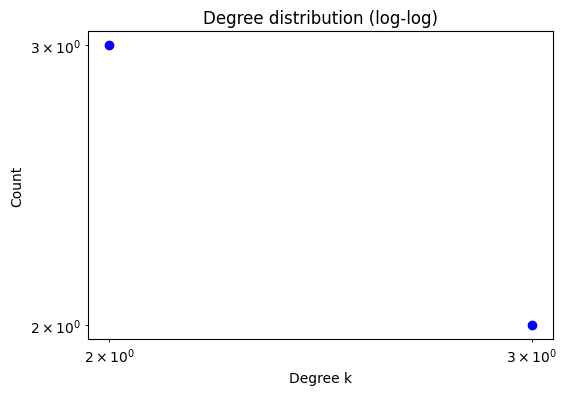

/usr/local/lib/python3.12/dist-packages/networkx/drawing/nx_pylab.py:1438: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


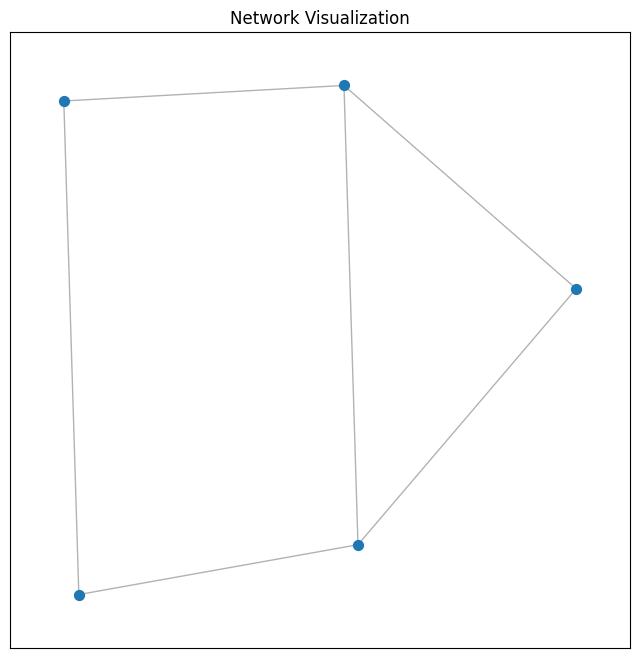

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
from networkx.algorithms import community

# Load GML file
G = nx.read_gml("network.gml")

# 1. Basic properties
N = G.number_of_nodes()
L = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / N
print(f"Nodes: {N}, Edges: {L}, Avg degree: {avg_degree:.2f}")

# 2. Connectivity
components = sorted(nx.connected_components(G), key=len, reverse=True)
GCC = G.subgraph(components[0])
print(f"Connected components: {len(components)}")
print(f"GCC size: {GCC.number_of_nodes()} nodes")

# 3. Path stats
avg_path = nx.average_shortest_path_length(GCC)
diameter = nx.diameter(GCC)
print(f"Avg path length: {avg_path:.2f}, Diameter: {diameter}")

# 4. Clustering
clustering = nx.average_clustering(G)
print(f"Avg clustering coefficient: {clustering:.3f}")

# 5. Centralities
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)
close_cent = nx.closeness_centrality(G)
eig_cent = nx.eigenvector_centrality(G)

# Show top nodes by degree
sorted_deg = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:", sorted_deg)

# 6. Community detection (Louvain if available, else greedy modularity)
communities = community.greedy_modularity_communities(G)
print(f"Detected {len(communities)} communities")

# 7. Degree distribution
degrees = [d for n, d in G.degree()]
degree_count = collections.Counter(degrees)
deg, cnt = zip(*sorted(degree_count.items()))

plt.figure(figsize=(6,4))
plt.loglog(deg, cnt, "bo")
plt.xlabel("Degree k")
plt.ylabel("Count")
plt.title("Degree distribution (log-log)")
plt.show()

# 8. Network visualization
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=50, cmap=plt.cm.Set1)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Network Visualization")
plt.show()


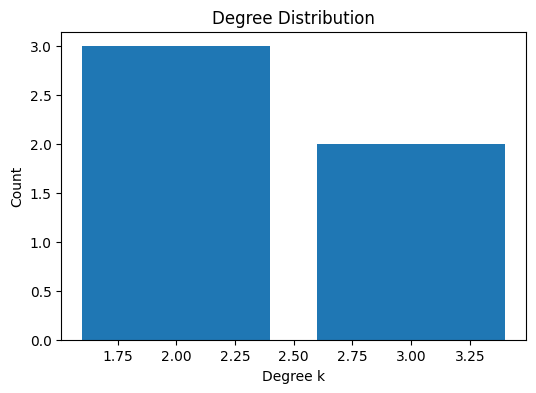

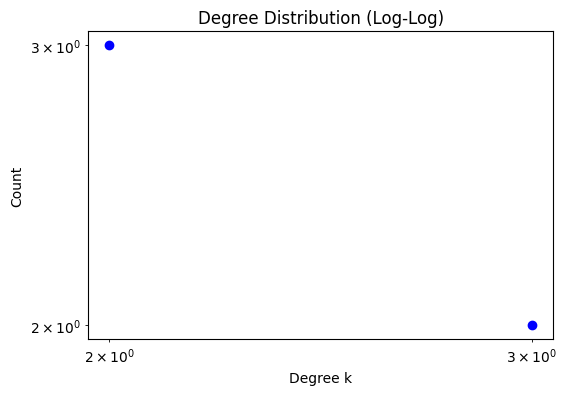

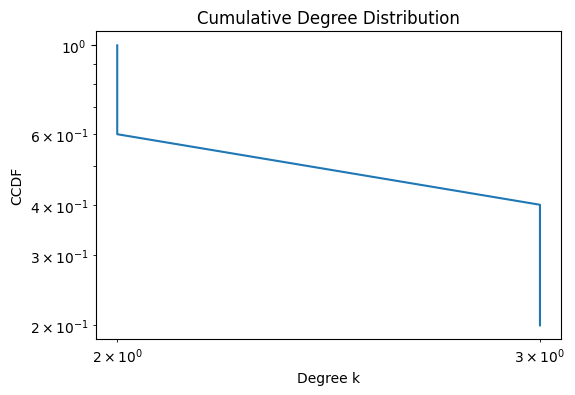

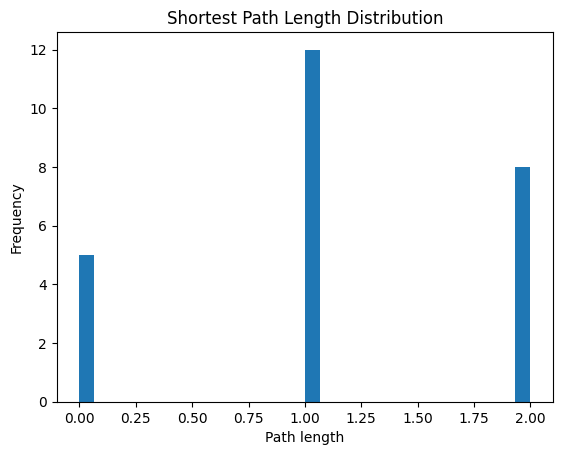

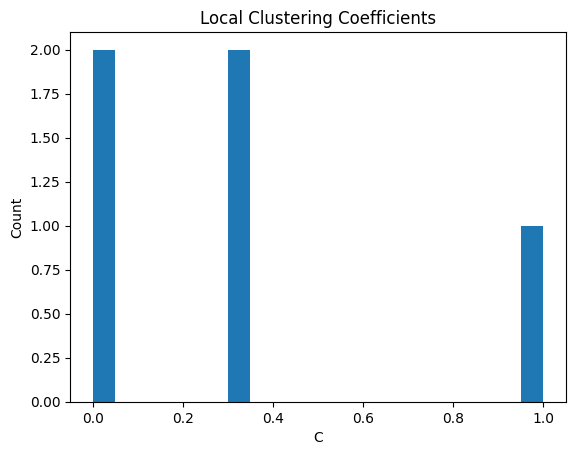

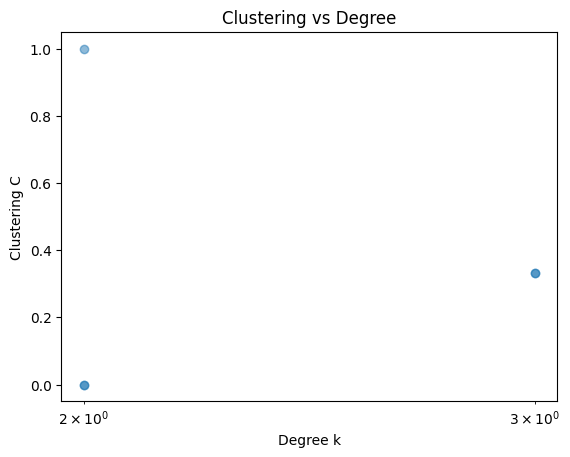

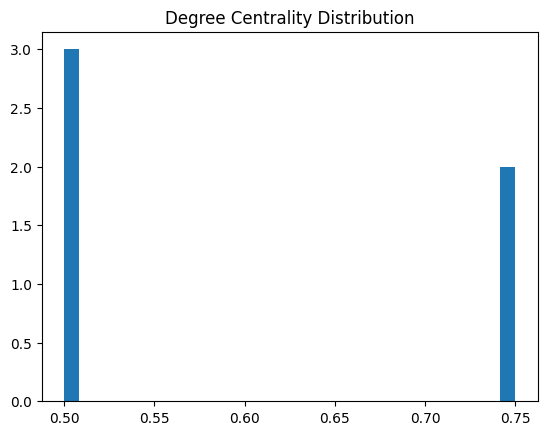

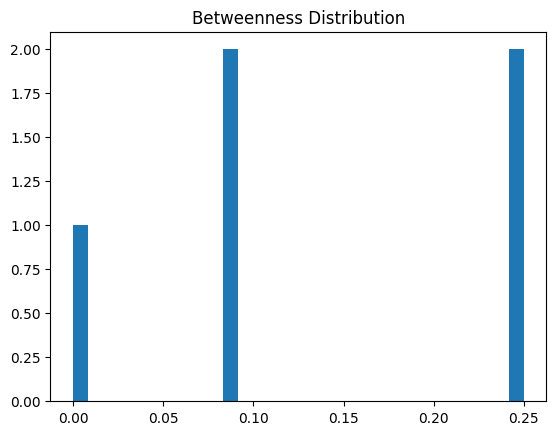

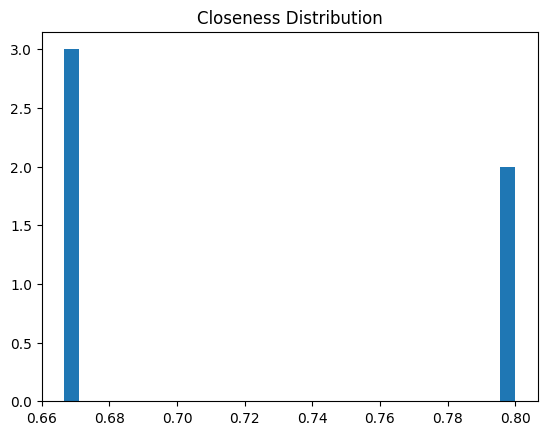

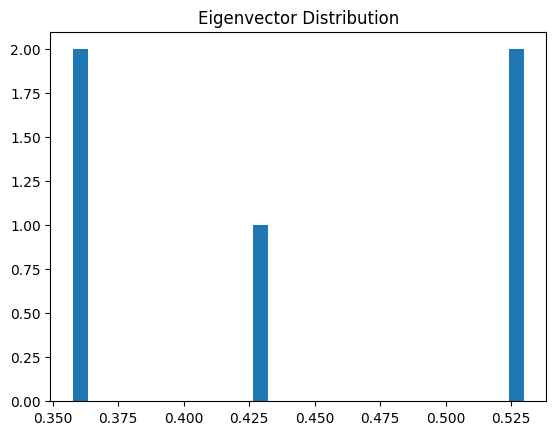

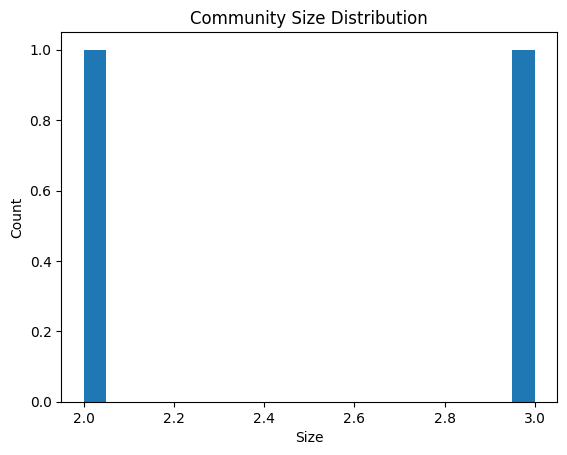

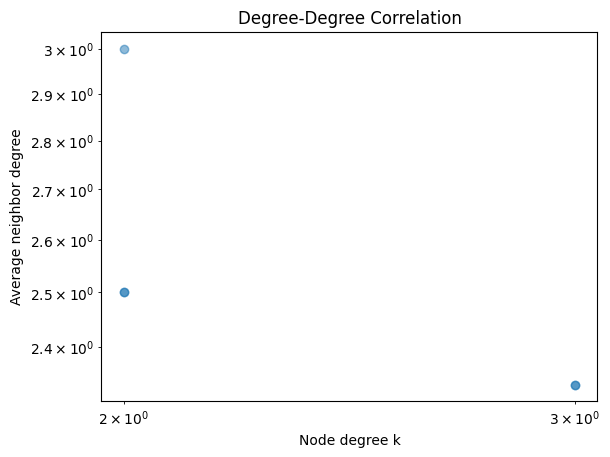

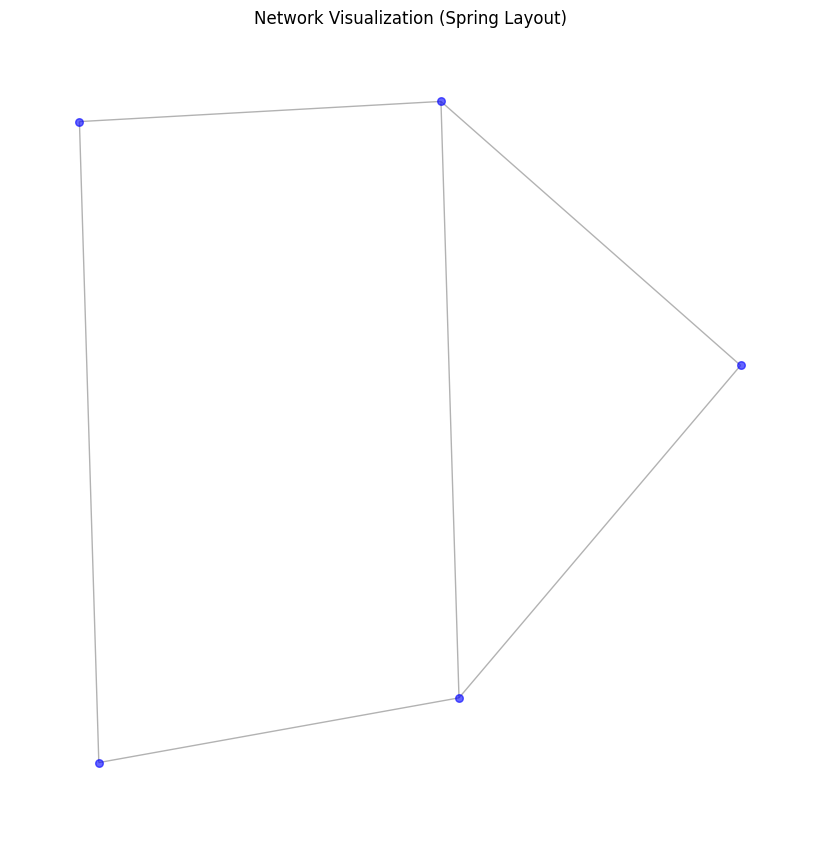

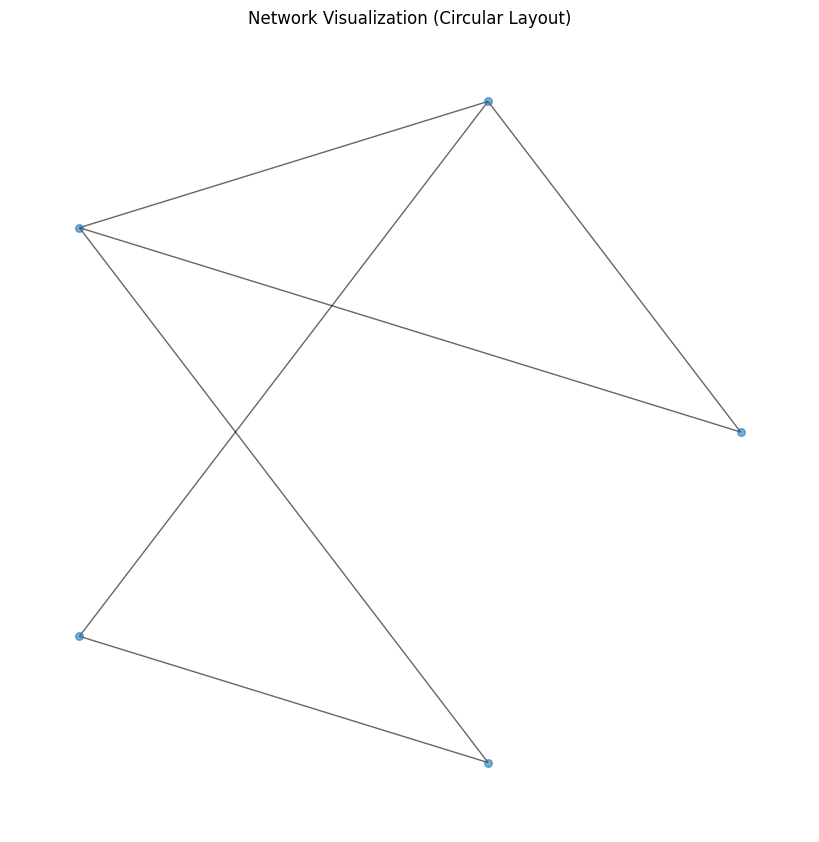

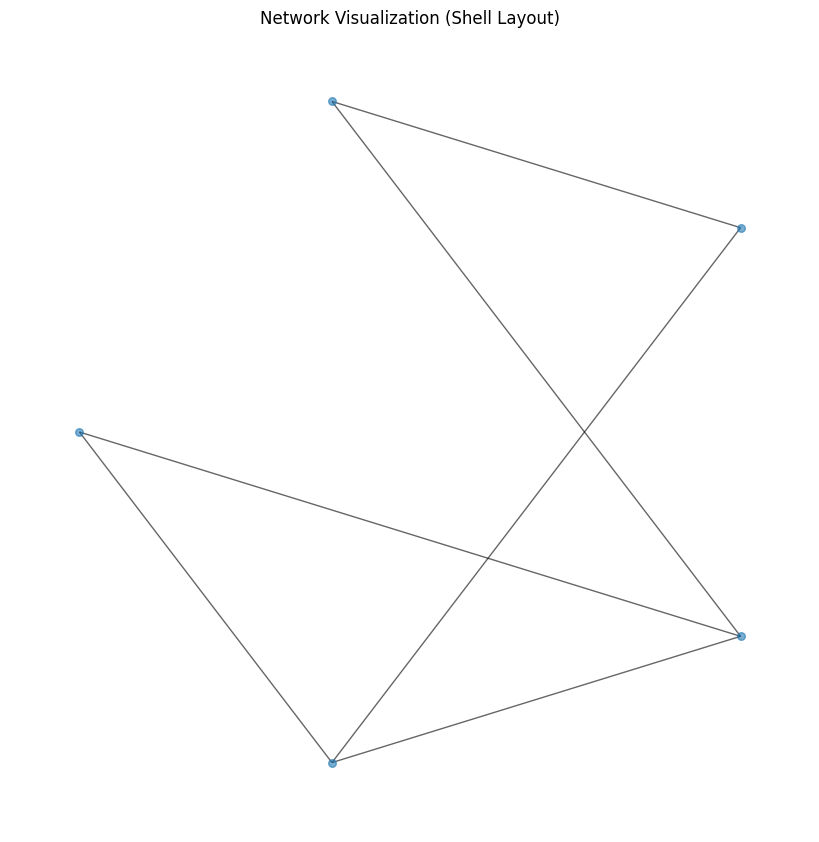

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import collections
import numpy as np
from networkx.algorithms import community

# Load network
G = nx.read_gml("network.gml")

# Ensure largest connected component for path-based metrics
components = sorted(nx.connected_components(G), key=len, reverse=True)
GCC = G.subgraph(components[0]).copy()

# Degree distribution
degrees = [d for n, d in G.degree()]
deg_count = collections.Counter(degrees)
deg, cnt = zip(*sorted(deg_count.items()))

plt.figure(figsize=(6,4))
plt.bar(deg, cnt)
plt.title("Degree Distribution")
plt.xlabel("Degree k")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
plt.loglog(deg, cnt, "bo")
plt.title("Degree Distribution (Log-Log)")
plt.xlabel("Degree k")
plt.ylabel("Count")
plt.show()

# Cumulative degree distribution
sorted_deg = sorted(degrees)
cdf = np.arange(len(sorted_deg))/len(sorted_deg)
plt.figure(figsize=(6,4))
plt.plot(sorted_deg, 1-cdf)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Degree k")
plt.ylabel("CCDF")
plt.title("Cumulative Degree Distribution")
plt.show()

# Shortest path length distribution
lengths = dict(nx.all_pairs_shortest_path_length(GCC))
all_lengths = [l for d in lengths.values() for l in d.values()]
plt.hist(all_lengths, bins=30)
plt.title("Shortest Path Length Distribution")
plt.xlabel("Path length")
plt.ylabel("Frequency")
plt.show()

# Clustering coefficient histogram
clust = nx.clustering(G)
plt.hist(clust.values(), bins=20)
plt.title("Local Clustering Coefficients")
plt.xlabel("C")
plt.ylabel("Count")
plt.show()

# Clustering vs degree
plt.scatter(degrees, list(clust.values()), alpha=0.5)
plt.xscale("log")
plt.title("Clustering vs Degree")
plt.xlabel("Degree k")
plt.ylabel("Clustering C")
plt.show()

# Centrality histograms
centralities = {
    "Degree Centrality": nx.degree_centrality(G),
    "Betweenness": nx.betweenness_centrality(G),
    "Closeness": nx.closeness_centrality(G),
    "Eigenvector": nx.eigenvector_centrality(G, max_iter=500),
}

for name, cent in centralities.items():
    plt.hist(cent.values(), bins=30)
    plt.title(f"{name} Distribution")
    plt.show()

# Communities
communities = community.greedy_modularity_communities(G)
sizes = [len(c) for c in communities]
plt.hist(sizes, bins=20)
plt.title("Community Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()

# Assortativity: average neighbor degree vs node degree
avg_nbr_deg = nx.average_neighbor_degree(G)
plt.scatter(degrees, list(avg_nbr_deg.values()), alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Node degree k")
plt.ylabel("Average neighbor degree")
plt.title("Degree-Degree Correlation")
plt.show()

# Network visualizations
plt.figure(figsize=(8,8))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_size=30, node_color="blue", edge_color="gray", alpha=0.6)
plt.title("Network Visualization (Spring Layout)")
plt.show()

plt.figure(figsize=(8,8))
nx.draw_circular(G, node_size=30, alpha=0.6)
plt.title("Network Visualization (Circular Layout)")
plt.show()

plt.figure(figsize=(8,8))
nx.draw_shell(G, node_size=30, alpha=0.6)
plt.title("Network Visualization (Shell Layout)")
plt.show()


## Read from file

In [ ]:
import networkx as nx

# Unweighted edge list
G = nx.read_edgelist("network.txt", nodetype=int)

# Weighted edge list
Gw = nx.read_edgelist("network.txt", nodetype=int, data=(("weight", float),))

G = nx.read_adjlist("network.txt", nodetype=int)

#adj matrix
A = np.loadtxt("network.txt", dtype=int)
G = nx.from_numpy_array(A)

G = nx.read_gml("network.txt")

import csv

G = nx.Graph()
with open("network.txt") as f:
    reader = csv.reader(f, delimiter=",")  # change delimiter if needed
    for row in reader:
        u, v = row[0], row[1]
        G.add_edge(u, v)
+


## Generate using power-law

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

N = 103
avg_k = 2

# Generate ER graph
p = avg_k / (N - 1)
G_er = nx.erdos_renyi_graph(N, p, seed=42)

# Generate scale-free network using power-law degree sequence
gamma = 3  # exponent for power-law P(k) ~ k^-gamma
min_degree = 1

# Generate power-law degree sequence
degree_sequence = np.random.zipf(gamma, N)
# Ensure all degrees >= min_degree and sum is even
degree_sequence = np.maximum(degree_sequence, min_degree)
if sum(degree_sequence) % 2 != 0:
    degree_sequence[0] += 1

# Generate graph using configuration model
G_sf = nx.configuration_model(degree_sequence, seed=42)
G_sf = nx.Graph(G_sf)  # remove parallel edges
G_sf.remove_edges_from(nx.selfloop_edges(G_sf))

# Plot degree distributions
plt.figure(figsize=(10,5))

# ER degree distribution
degrees_er = [d for n, d in G_er.degree()]
plt.hist(degrees_er, bins=range(max(degrees_er)+2), alpha=0.6, label='ER', color='skyblue')

# Scale-free degree distribution
degrees_sf = [d for n, d in G_sf.degree()]
plt.hist(degrees_sf, bins=range(max(degrees_sf)+2), alpha=0.6, label='Power-law SF', color='orange')

plt.xlabel("Degree k")
plt.ylabel("Frequency")
plt.title("Degree Distributions")
plt.legend()
plt.show()


## Comparing Threshold


In [1]:
import networkx as nx
import numpy as np

N = 103
avg_k = 2

# ER graph
p_er = avg_k / (N-1)
G_er = nx.erdos_renyi_graph(N, p_er)

# Power-law network
gamma = 3
degree_sequence_pl = np.random.zipf(gamma, N)
degree_sequence_pl = np.maximum(degree_sequence_pl, 1)
if sum(degree_sequence_pl) % 2 != 0:
    degree_sequence_pl[0] += 1
G_pl = nx.configuration_model(degree_sequence_pl)
G_pl = nx.Graph(G_pl)
G_pl.remove_edges_from(nx.selfloop_edges(G_pl))

# Uniform degree network
degree_sequence_uniform = np.random.randint(1, 5, N)  # degrees 1-4
if sum(degree_sequence_uniform) % 2 != 0:
    degree_sequence_uniform[0] += 1
G_uniform = nx.configuration_model(degree_sequence_uniform)
G_uniform = nx.Graph(G_uniform)
G_uniform.remove_edges_from(nx.selfloop_edges(G_uniform))

# Normal degree network
mean_k = avg_k
std_k = 1
degree_sequence_normal = np.random.normal(mean_k, std_k, N).astype(int)
degree_sequence_normal = np.clip(degree_sequence_normal, 1, N-1)
if sum(degree_sequence_normal) % 2 != 0:
    degree_sequence_normal[0] += 1
G_normal = nx.configuration_model(degree_sequence_normal)
G_normal = nx.Graph(G_normal)
G_normal.remove_edges_from(nx.selfloop_edges(G_normal))

def critical_threshold(G):
    degrees = np.array([d for n, d in G.degree()])
    k_avg = degrees.mean()
    k2_avg = (degrees**2).mean()
    return k_avg / (k2_avg - k_avg)

pc_er = critical_threshold(G_er)
pc_pl = critical_threshold(G_pl)
pc_uniform = critical_threshold(G_uniform)
pc_normal = critical_threshold(G_normal)

print("Critical thresholds:")
print(f"ER network: {pc_er:.4f}")
print(f"Power-law network: {pc_pl:.4f}")
print(f"Uniform degree network: {pc_uniform:.4f}")
print(f"Normal degree network: {pc_normal:.4f}")



Critical thresholds:
ER network: 0.5632
Power-law network: 1.5366
Uniform degree network: 0.5000
Normal degree network: 0.9167


## Similar to Wattz schtrogatz

Number of nodes: 100
Number of edges: 194
Average clustering coefficient: 0.04117413632119514
Diameter (largest component): 6


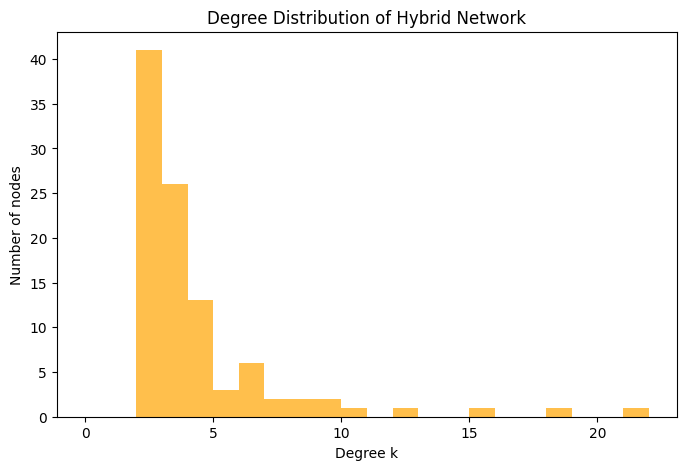

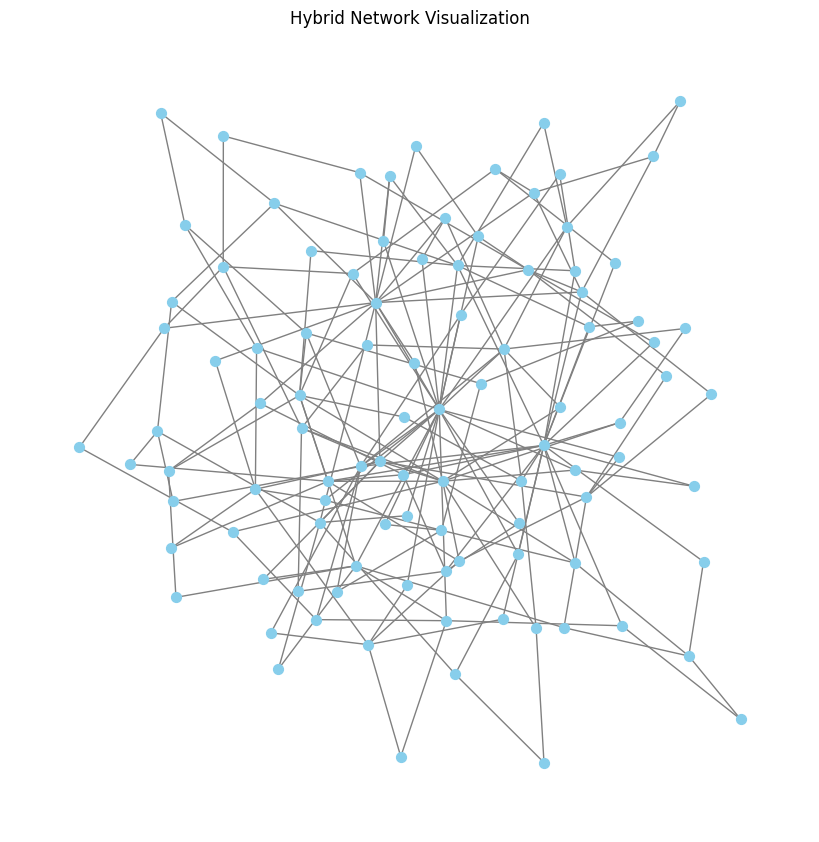

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np

N = 100
m = 2
p_rewire = 0.1

G = nx.cycle_graph(5)


for new_node in range(5, N):
    G.add_node(new_node)

    # Compute degrees and total degree
    degrees = np.array([G.degree(n) for n in G.nodes()])
    total_deg = degrees.sum()

    # Preferential attachment: select m nodes proportional to degree
    targets = set()
    while len(targets) < m:
        rand_node = np.random.choice(G.nodes(), p=degrees/total_deg)
        if rand_node != new_node:
            targets.add(rand_node)

    # Connect new node
    for t in targets:
        G.add_edge(new_node, t)

        # Step 3: Rewire with probability p_rewire
        if random.random() < p_rewire:
            G.remove_edge(new_node, t)
            possible_nodes = list(set(G.nodes()) - {new_node})
            new_target = random.choice(possible_nodes)
            G.add_edge(new_node, new_target)

# --- Analysis ---
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(G))

# Diameter of largest component
largest_cc_nodes = max(nx.connected_components(G), key=len)
largest_cc = G.subgraph(largest_cc_nodes)
print("Diameter (largest component):", nx.diameter(largest_cc))


# --- Degree Distribution ---
degrees = [d for n, d in G.degree()]
plt.figure(figsize=(8,5))
plt.hist(degrees, bins=range(max(degrees)+1), alpha=0.7, color='orange')
plt.xlabel("Degree k")
plt.ylabel("Number of nodes")
plt.title("Degree Distribution of Hybrid Network")
plt.show()

# --- Visualize network ---
plt.figure(figsize=(8,8))
nx.draw_spring(G, node_size=50, node_color='skyblue', edge_color='gray')
plt.title("Hybrid Network Visualization")
plt.show()


## Separate communities

In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 120       # total nodes
C = 3         # number of communities
n0 = 5        # initial nodes per community
m = 2         # edges per new node
p_inter = 0.05  # probability of inter-community edge

G = nx.Graph()
community_map = {}  # node -> community

# Step 1: Create seed communities
node_id = 0
for c in range(C):
    H = nx.erdos_renyi_graph(n0, 0.5)
    mapping = {n: n + node_id for n in H.nodes()}
    H = nx.relabel_nodes(H, mapping)
    G = nx.compose(G, H)
    for n in H.nodes():
        community_map[n] = c
    node_id += n0

# Step 2: Add new nodes
while G.number_of_nodes() < N:
    new_node = node_id
    G.add_node(new_node)
    node_id += 1

    # Pick a community randomly
    c = random.randint(0, C-1)

    # Preferential attachment inside community
    community_nodes = [n for n in G.nodes() if community_map[n] == c]
    degrees = np.array([G.degree(n) for n in community_nodes])
    total_deg = degrees.sum()

    targets = set()
    while len(targets) < m:
        if total_deg == 0:
            targets.add(random.choice(community_nodes))
        else:
            t = np.random.choice(community_nodes, p=degrees/total_deg)
            targets.add(t)

    # Connect new node
    for t in targets:
        if random.random() < p_inter:
            # Rewire to another community
            other_com = random.choice([i for i in range(C) if i != c])
            other_nodes = [n for n in G.nodes() if community_map[n] == other_com]
            t = random.choice(other_nodes)
        G.add_edge(new_node, t)

    community_map[new_node] = c

# --- Analysis ---
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average clustering coefficient:", nx.average_clustering(G))

# Visualize communities
pos = nx.spring_layout(G, seed=42)
colors = [community_map[n] for n in G.nodes()]
plt.figure(figsize=(8,8))
nx.draw_networkx(G, pos, node_color=colors, cmap=plt.cm.Set3, node_size=100, with_labels=False)
plt.title("Community Network with Preferential Attachment")
plt.show()


## Communirty detection

In [5]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt

# Load graph from GML
G = nx.read_gml("graph.gml")

# Compute communities using Louvain
partition = community_louvain.best_partition(G)

# Number of communities
num_communities = len(set(partition.values()))
print("Number of communities:", num_communities)

# Modularity
mod = community_louvain.modularity(partition, G)
print("Modularity:", mod)

# Visualization
pos = nx.spring_layout(G)
colors = [partition[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, cmap=plt.cm.tab20, with_labels=False, node_size=50)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'graph.gml'

## Phase Transition

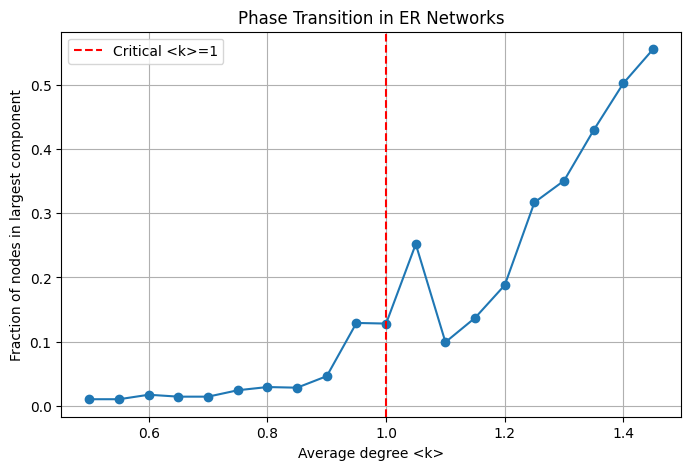

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

N = 1000
k_values = [0.5 + 0.05*i for i in range(20)]  # <k> from 0.5 to 1.45
largest_component_fraction = []

for k_avg in k_values:
    p = k_avg / (N-1)
    G = nx.erdos_renyi_graph(N, p)

    if len(G) > 0:
        largest_cc = max(nx.connected_components(G), key=len)
        largest_component_fraction.append(len(largest_cc)/N)
    else:
        largest_component_fraction.append(0)

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_values, largest_component_fraction, marker='o')
plt.axvline(1, color='red', linestyle='--', label="Critical <k>=1")
plt.xlabel("Average degree <k>")
plt.ylabel("Fraction of nodes in largest component")
plt.title("Phase Transition in ER Networks")
plt.legend()
plt.grid(True)
plt.show()
